## ECE 4200 Assignment 4

## Problem 4 (Linear Regression and Regularization)

### <font color='red'> You can either write your own code or use python package SKLearn in this assignment, other packages for linear regression are not allowed </font>

In this assignment, we use the Concrete Compressive Strength Dataset (https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength) from UCI machine learning repository. We will explore how to use linear regression to predict the concrete compressive strength given the proportion of different materials you use to make high-performance concrete.
Typical instances of this dataset looks like the following:

|Cement kg/m^3| Blast Furnace Slag kg/m^3 |Fly Ash kg/m^3| Water kg/m^3|Superplasticizer kg/m^3|Coarse Aggregate  kg/m^3| Fine Aggregate kg/m^3|Age day|  Concrete compressive strength MPa|
|:------ :|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
| 540.0 | 0.0  |0.0    |162.0 |2.5 	 |1040.0| 676.0|28 	  |79.99 |
|540.0 	|0.0 |	0.0 |	162.0 |	2.5 	|1055.0 |	676.0 |	28 |61.89| 
|266.0 	|114.0 |	0.0 |	228.0 |	0.0 |	932.0 |	670.0 	|28 |	45.85| 

### Data Splitting
We randomly split the dataset into two parts, the training set and the test set. The training set consists of 430 data points and the test set consists of 600 data points. Generally, the training dataset is larger than the test dataset. However, in this assignment, we make the training set to be smaller in order to highlight the influence of regularization. (Think about why regularization is more important when you have a smaller training set.) 
Using the following lines, we load all the training data into a numpy array $train$ and all the testing data into a numpy array $test$.

In [1]:
import numpy as np
import pandas
Trainfile = pandas.read_excel('Train.xlsx')
Testfile = pandas.read_excel('Test.xlsx')
train = Trainfile.values
test = Testfile.values
#Trainfile #output all the training samples in a table


The training inputs are stored in array $X_{trn}$, where $X_{trn}[i][j]$ represents the $j$th attribute of the $i$th instance in the training set. The training outputs are stored in array $y_{trn}$, where $y_{trn}[i]$ is the output of the $i$th instance in the training test.
Similarly we store the inputs and outputs of the test set in $X_{tst}$ and $y_{tst}$

In [2]:
X_trn_raw, y_trn = train[:,:-1], train[:,-1:]
X_tst_raw, y_tst = test[:,:-1], test[:,-1:]

### Data Preprocessing
In order to better use linear regression, we shift normalize all the attributes of training input and testing input to make each attribute zero mean and norm no larger than 1. We are not normailizing the output. (Think about why.)
After that, we append a bias attribute 1 to each of the input feartures.

In [3]:
inputs = np.concatenate((X_trn_raw, X_tst_raw),axis = 0)
inputs = inputs - np.mean(inputs,axis=0) #shift
inputs = inputs/(np.max(inputs,axis=0)) #normalize
inputs = np.concatenate((inputs, np.ones((X_trn_raw.shape[0]+X_tst_raw.shape[0],1))), axis = 1) #add bias
X_trn = inputs[:X_trn_raw.shape[0],:]
X_tst = inputs[X_trn_raw.shape[0]:,:]

### Let's get started
We do recommend you to understand the aforementioned steps since data preprocessing is a very important skill for a machine learning engineer. However, if you don't understand the previous pre-processing steps, it's totally fine. Now let's see what we get:
1. Training set $[X_{trn}, Y_{trn}]$, where all the input attributes are zero-mean and normalized. At the end of all the training inputs, there is a $1$ at the end to introduce the bias term.
2. Testing set $[X_{tst}, Y_{tst}]$ which has the same property as the training set.

### (1) Linear regression (without regularization)
Let's look at the first task. You can either use functions in Sklearn or write your own code to train a linear regressor on the training set.
The goal here is to find the $w$ which minimizes the training loss
\begin{equation}
    w^* = \arg \min_w \frac1{|S_{trn}|}\sum_{i \in S_{trn}}(w\cdot x_i - y_i)^2
\end{equation}
Output the squre root of your average training loss and average test loss
\begin{equation}
    l_{trn} = \sqrt{\frac1{|S_{trn}|}\sum_{i \in S_{trn}} ( w^*\cdot x_i - y_i)^2} \text{, }l_{tst} = \sqrt{\frac1{|S_{tst}|}\sum_{i \in S_{tst}} (w^* \cdot x_i - y_i)^2}
\end{equation}

In [32]:
# PART 1: Simple Linear Regression
# store your training loss in l_trn and testing loss in l_tst
#edit within this range
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
l_trn = 0
l_tst = 0
#=======FILL IN YOUR CODE HERE===========
clf = Ridge(alpha=0)
clf.fit(X_trn, y_trn)
l_trn = np.sqrt(mean_squared_error(y_trn, clf.predict(X_trn)));
# l_trn = np.sqrt(np.mean((np.dot(np.argmin(clf.coef_), X_trn) - y_trn)**2))
clf.fit(X_tst, y_tst)
l_tst = np.sqrt(mean_squared_error(y_tst, clf.predict(X_tst)));
# l_tst = np.sqrt(np.mean((np.dot(np.argmin(clf.coef_), X_tst) - y_tst)**2))
#===========END EDIT=====================
print('The average training loss is: ', l_trn)
print('The average test loss is: ', l_tst)

The average training loss is:  9.727779122009025
The average test loss is:  10.705630629612918


### (2) Linear Ridge regression

You may observe that training error is smaller than the test error. This is because we are overfitting to the training data. Regularization is a good way to avoid overfitting. Recall that $\lambda$- Ridge regression is to add an additional $\ell_2$-norm of the weight vector to refine the obejective function:

\begin{equation}
    w^\lambda = \arg \min_w \frac1{|S_{trn}|}\sum_{i \in S_{trn}}(w \cdot x_i - y_i)^2 + \lambda|w|^2
\end{equation}

Try Ridge regression on the same dataset (the dataset with more attributes) under $\lambda = 0.001 \times (1.2)^i, i = 0,1,2,3,...,99$. Plot the training loss and test loss under different regression parameter and answer the flowing questions:
1. Describe the trend of training error? (Increase w.r.t $\lambda$, decrese w.r.t $\lambda$, remain constant, first increase then decrease or first decrease then increase). Try to explain.

2. Describe the trend of testing error? (Increase w.r.t $\lambda$, decrese w.r.t $\lambda$, remain constant, first increase then decrease or first decrease then increase). Try to explain


Training and testing error are defined without the regularization term:
\begin{equation}
    l_{trn}^\lambda = \sqrt{\frac1{|S_{trn}|}\sum_{i \in S_{trn}} (w^\lambda \cdot x_i - y_i)^2} \text{, }l_{tst}^\lambda = \sqrt{\frac1{|S_{tst}|}\sum_{i \in S_{tst}} (w^\lambda \cdot x_i - y_i)^2}
\end{equation}

### Your response here:
1. At first, the training error remains constant. However, as $\lambda$ continue increasing, the trend of training error also increases. This is because as $\lambda$ increases, it gradually becomes the dominant one and the coefficients will be smaller than they suppose to be to get the greatest accuarcy, and it leads to a decrease in flexibility. Thus increases the tarining loss.

2. Same as the training error, at some point, as $\lambda$ increases, at some point, the trend of testing error rises expotientially, this is because $\lambda$ is too big that causes underfitting. 

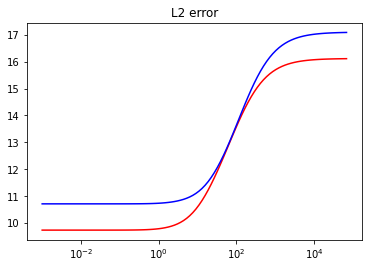

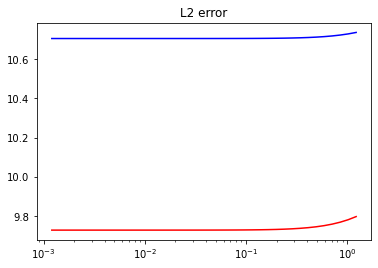

In [12]:
# PART 2: Linear Ridge Regression

# In this part, you will perform linear Ridge Regression. 
# You will plot the training and test error as a function of lambda

import matplotlib.pyplot as plt
%matplotlib inline
lamb = []
points = 100
for i in range(points):  
    lamb.append(0.001*(1.2**i))
    #= 0.001 * [1, 1.2, 1.44, ..., 1.2^99] #lambda values #lambda values
err_trn = [] # store your training error in this vector
err_tst = [] # store your testing error in this vector
#edit within this range


#========FILL IN CODE HERE==============
for i in range(points):
    clf = Ridge(alpha=lamb[i])
    clf.fit(X_trn, y_trn)
    err_trn.append(np.sqrt(mean_squared_error(y_trn, clf.predict(X_trn))))
#   err_trn.append(np.sqrt(np.mean((np.dot(np.argmin(clf.coef_), X_trn) - y_trn)**2)))

for i in range(points):
    clf = Ridge(alpha=lamb[i])
    clf.fit(X_tst, y_tst)
    err_tst.append(np.sqrt(mean_squared_error(y_tst, clf.predict(X_tst))))
#   err_tst.append(np.sqrt(np.mean((np.dot(np.argmin(clf.coef_), X_tst) - y_tst)**2)))
#===============END EDIT================
plt.semilogx(lamb,err_trn,color='red')
plt.semilogx(lamb,err_tst,color='blue')
plt.title("L2 error")
plt.show()
plt.semilogx(lamb[1:40],err_trn[1:40],color='red')
plt.semilogx(lamb[1:40],err_tst[1:40],color='blue')
plt.title("L2 error")
plt.show()

###  Add more attributes

Can we do more beyond simple linear regression? Since the relationship between each attribute and the final output may not necessarily be linear, we may do better if we add some non-linearity. We can add the square of each attribute to our training input and do linear regression on the new set of attributes.

Remark: This is called polynomial regression, please google it if you are interested.

In [34]:
inputs = np.concatenate((X_trn_raw, X_tst_raw),axis = 0)
inputs_new = np.concatenate((inputs,np.square(inputs)),axis=1) #add square term
inputs_new = inputs_new - np.mean(inputs_new,axis=0) #shift
inputs_new = inputs_new/(np.max(inputs_new,axis=0)) #normalize
inputs_new = np.concatenate((inputs_new, np.ones((X_trn_raw.shape[0]+X_tst_raw.shape[0],1))), axis = 1) # add bias
X_trn_new = inputs_new[:X_trn_raw.shape[0],:]
X_tst_new = inputs_new[X_trn_raw.shape[0]:,:]

### (3) Quadratic regression (without regularization)
Recall now we have $X^{new}_{trn}$ as our new training features and $X^{new}_{tst}$ as our new test features. 
\begin{equation}
    x^{new}_i = (x_i[1],x_i[2], ..., x_i[d], x_i[1]^2,x_i[2]^2, ..., x_i[d]^2 )
\end{equation}
Do the same thing as in Problem (1). Find the minimizer of the training error:
\begin{equation}
    w^* = \arg \min_w \frac1{|S_{trn}|}\sum_{i \in S_{trn}}(w \cdot x^{new}_i - y_i)^2
\end{equation}
Output the squre root of your average training loss and average test loss
\begin{equation}
    l_{trn} = \sqrt{\frac1{|S_{trn}|}\sum_{i \in S_{trn}} (w^* \cdot x^{new}_i - y_i)^2} \text{, }l_{tst} = \sqrt{\frac1{|S_{tst}|}\sum_{i \in S_{tst}} (w^*\cdot x^{new}_i - y_i)^2}
\end{equation}

In [35]:
#PART 3: Quatratic Regression

# store your training loss in l_trn and testing loss in l_tst
#edit within this range
l_trn = 0
l_tst = 0
#============FILL IN CODE HERE============
clf = Ridge(alpha=0)
clf.fit(X_trn_new, y_trn)
l_trn = np.sqrt(mean_squared_error(y_trn, clf.predict(X_trn_new)));
clf.fit(X_tst_new, y_tst)
l_tst = np.sqrt(mean_squared_error(y_tst, clf.predict(X_tst_new)));
#================end edit=================
print('The average training loss is: ', l_trn)
print('The average test loss is: ', l_tst)

The average training loss is:  7.481820649524704
The average test loss is:  7.922459119915694


### (4) Quadratic Ridge regression

In this problem, we do the same regularization as in Problem (2) to our new dataset:

Recall that $\lambda$- Ridge regression is to add an additional $\ell_2$-norm of the weight vector to refine the obejective function:

\begin{equation}
    w^\lambda = \arg \min_w \frac1{|S_{trn}|}\sum_{i \in S_{trn}}(w\cdot x^{new}_i - y_i)^2 + \lambda|w|^2
\end{equation}

Try Ridge regression on the new dataset (the dataset with more attributes) under $\lambda = 0.001 \times (1.2)^i, i = 0,1,2,3,...,99$. Plot the training loss and test loss under different regression parameter and answer the flowing questions:
1. Describe the trend of training error? (Increase w.r.t $\lambda$, decrese w.r.t $\lambda$, remain constant, first increase then decrease or first decrease then increase). Try to explain.


2. Describe the trend of testing error? (Increase w.r.t $\lambda$, decrese w.r.t $\lambda$, remain constant, first increase then decrease or first decrease then increase). Try to explain


Training and testing error are defined without the regularization term:
\begin{equation}
    l_{trn}^\lambda = \sqrt{\frac1{|S_{trn}|}\sum_{i \in S_{trn}} (w^\lambda\cdot x^{new}_i - y_i)^2} \text{, }l_{tst}^\lambda = \sqrt{\frac1{|S_{tst}|}\sum_{i \in S_{tst}} (w^\lambda\cdot x^{new}_i - y_i)^2}
\end{equation}

### Your response here:
1. As $\lambda$ increases to some point, the prediction become less sensitive and $\lambda$ leads the increase of the training error. This is because that $\lambda$ becomes the dominent one and the flexibility of Ridge Regression decreases, thus increases the variance. 

2. As $\lambda$ continues to grow, the impact of the shrinkage penalty grows, and the ridge regression coefficient estimates will approach to zero. Thus the testing error increases.

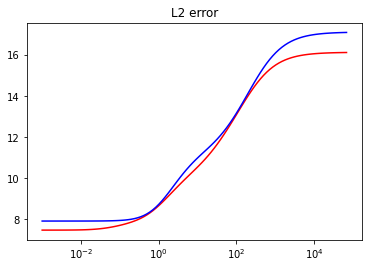

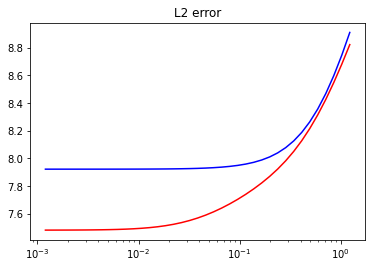

In [23]:
# PART 4: Quadratic Ridge Regression

# In this part, you will perform Ridge Regression. 
# You will plot the training and test error as a function of lambda

import matplotlib.pyplot as plt
%matplotlib inline
lamb = []
points = 100
for i in range(points):  
    lamb.append(0.001*(1.2**i))
    #= 0.001 * [1, 1.2, 1.44, ..., 1.2^99] #lambda values
err_trn = [] # store your training error in this vector
err_tst = [] # store your testing error in this vector

#=========PLEASE FILL IN THE CODE HERE=========
for i in range(points):
    clf = Ridge(alpha=lamb[i])
    clf.fit(X_trn_new, y_trn)
    err_trn.append(np.sqrt(mean_squared_error(y_trn, clf.predict(X_trn_new))))

for i in range(points):
    clf = Ridge(alpha=lamb[i])
    clf.fit(X_tst_new, y_tst)
    err_tst.append(np.sqrt(mean_squared_error(y_tst, clf.predict(X_tst_new))));

#==================end edit====================

plt.semilogx(lamb,err_trn,color='red')
plt.semilogx(lamb,err_tst,color='blue')
plt.title("L2 error")
plt.show()
plt.semilogx(lamb[1:40],err_trn[1:40],color='red')
plt.semilogx(lamb[1:40],err_tst[1:40],color='blue')
plt.title("L2 error")
plt.show()

### (5) Discussion
Compare the plots of Linear Ridge Regression and Quadratic Ridge Regression. When regularization parameter $\lambda=0$, which method suffers more from overfitting, linear regression or quadratic regression? Explain how you discover it from the plots, and why this method suffers more from overfitting.

### Your Answer Here:
Quardratic regression suffers more from overfitting, observing the plots from linear regression and quardratic regression, we can find that the polynomial from quadratic regression wiggles more, which means that it suffers more from overfitting since you add more features thus increased the degree in quadratic regression.
